Name: Samin Thapa

University ID: 2408644

Dataset Source: Student Performance
The dataset was created by Nikhil Narayan in the year 2023.
The dataset can be accessed through the following Kaggle link:
https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression/data
This dataset aligns with the United Nations Sustainable Development Goal 4, which aims to "ensure inclusive and equitable quality education and promote lifelong learning opportunities for all."

Key features:
- Hours Studied
- Previous Scores
- Extracurricular Activities
- Sleep Hours
- Sample Question Papers Practiced
- Performance Index


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Concept and Technologies of AI/Coursework/Student_Performance.csv')

# Display the first few rows
print(df.head())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [ ]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000      9.000000   

       Sample Question Papers Practiced  Performance Index  
count                      10000.000000       10000.000000  
mean                           4.583300          55.224800  
std                            2.867348          19.212558  
min                            0.000000          10.000000  
25%                            2.000000          40.000000  
50%                            5.000000          55.000000  
75%                            7.000000          71.00000

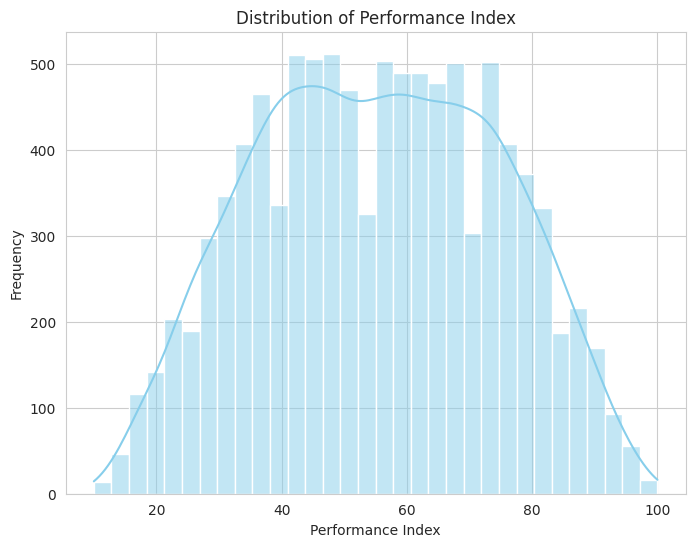

In [ ]:
# Distribution plot for 'Performance Index'
plt.figure(figsize=(8, 6))
sns.histplot(df['Performance Index'], kde=True, color='skyblue')
plt.title('Distribution of Performance Index')
plt.xlabel('Performance Index')
plt.ylabel('Frequency')
plt.show()

This histogram, complemented by a Kernel Density Estimate (KDE), reveals the distribution pattern of the 'Performance Index'. A normal distribution would appear bell-shaped, while deviations might indicate skewness or the presence of outliers.

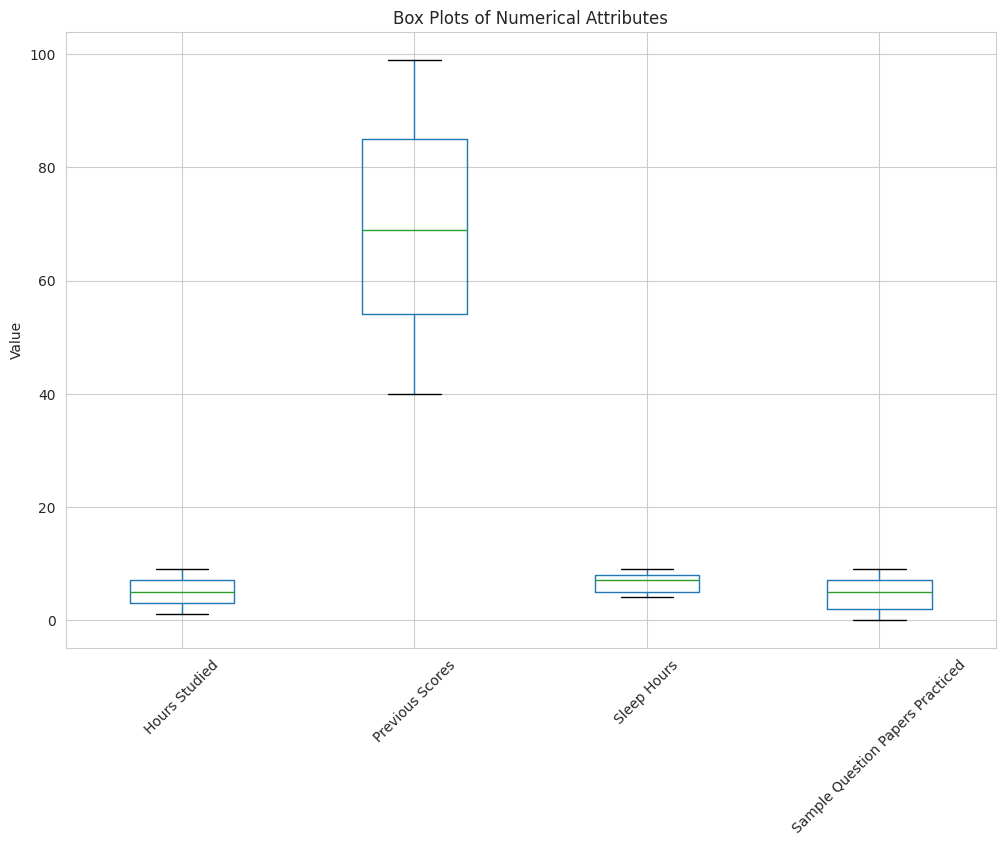

In [ ]:
# List of numerical attributes
numerical_attributes = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']

# Box plots for numerical attributes
plt.figure(figsize=(12, 8))
df[numerical_attributes].boxplot()
plt.title('Box Plots of Numerical Attributes')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

Box plots display the median, quartiles, and potential outliers for each numerical attribute. This visualization aids in understanding the central tendency and variability of the data, as well as identifying any anomalies.

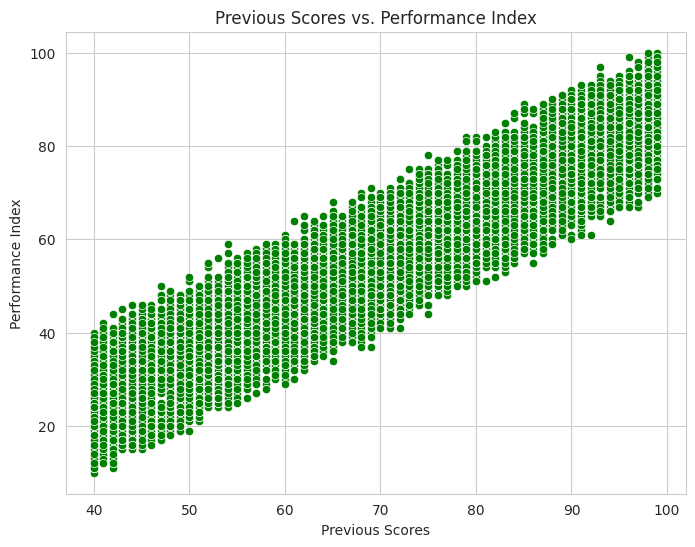

In [ ]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Scatter plot for 'Previous Scores' vs. 'Performance Index'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Previous Scores', y='Performance Index', data=df, color='green')
plt.title('Previous Scores vs. Performance Index')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.show()



This scatter plot allows us to observe the relationship between students' previous scores and their current performance index. A positive correlation would suggest that higher previous scores are associated with higher current performance. Conversely, a lack of correlation or a negative trend would indicate that past performance does not predict current performance.

In [ ]:
df['Extracurricular Activities']=df['Extracurricular Activities'].map({'Yes':1,'No':0})

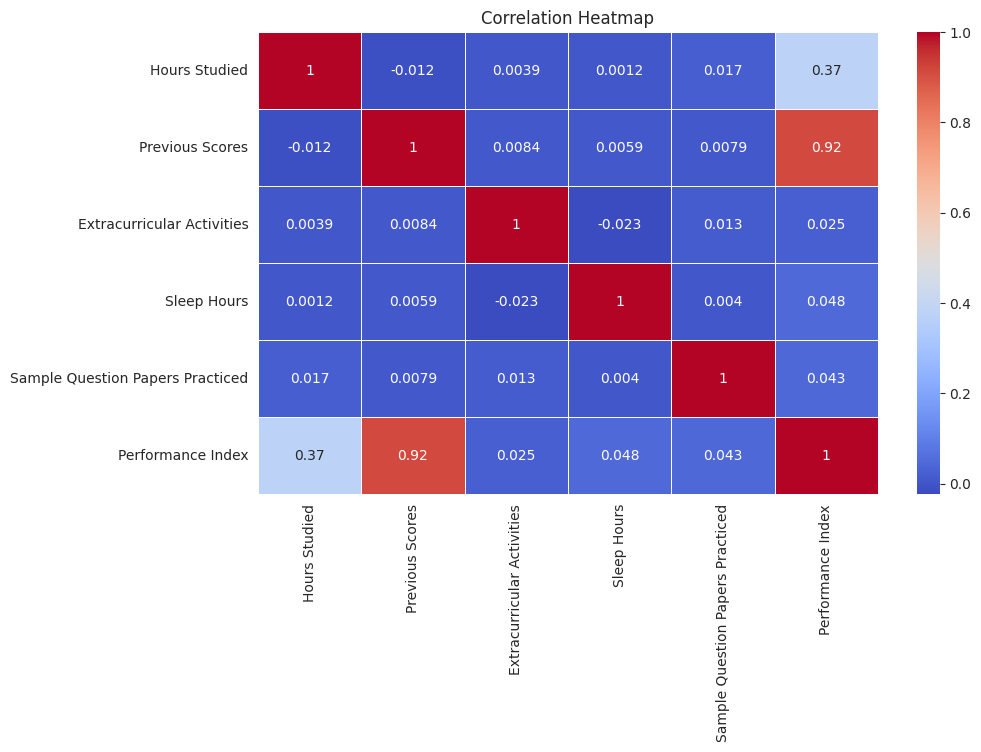

In [ ]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


The heatmap displays correlation coefficients between variables, indicating the strength and direction of their relationships. This is crucial for identifying which factors are most strongly associated with the 'Performance Index'.

By employing these visualizations, we gain a comprehensive understanding of the dataset's structure, distributions, and relationships, which are essential for informed modeling and analysis.

## 2.Linear Regression from scratch

Final Weights: [55.23668448  7.38057854 17.67562037  0.27573065  0.8044969   0.5495219 ]
Cost History (First 10 iterations): [1609.8773767851048, 1514.8814072180476, 1425.4994381361334, 1341.399624138597, 1262.2697397362806, 1187.8160190844349, 1117.762064346559, 1051.8478186287175, 989.8285996640668, 931.474190653403]
RMSE on Test Set: 2.037685536483067
R-Squared on Test Set: 0.9886242370062446


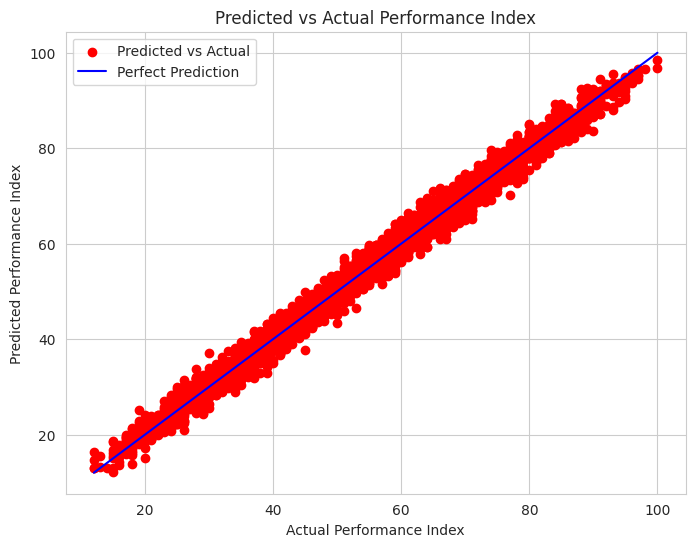

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Concept and Technologies of AI/Coursework/Student_Performance.csv')

# Convert categorical column to numeric
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'No': 0, 'Yes': 1})

# Handle Missing Values
imputer = SimpleImputer(strategy='mean')
df.iloc[:, :] = imputer.fit_transform(df)

# Prepare Features (X) and Target (Y)
X = df.drop(labels=['Performance Index'], axis=1).values
Y = df['Performance Index'].values.reshape(-1, 1)

# Standardize Features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add bias term (Intercept)
X = np.c_[np.ones((X.shape[0], 1)), X]  # Adds a column of ones

# Train-Test Split Function
def train_test_split_scratch(x, y, test_size=0.3, random_seed=32):
    np.random.seed(random_seed)
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)

    test_split_size = int(len(x) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]

    x_train, x_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return x_train, x_test, y_train, y_test

# Split Data
X_train, X_test, Y_train, Y_test = train_test_split_scratch(X, Y, test_size=0.3)

# Initialize Weights with Small Random Values
W = np.random.randn(X_train.shape[1], 1) * 0.01

# Linear Cost Function
def linear_cost_function(X, Y, W):
    m = len(Y)
    Y_pred = np.dot(X, W)
    error = Y_pred - Y
    cost = (1 / (2 * m)) * np.sum(error ** 2)
    return cost

# Linear Gradient Descent
def linear_gradient_descent(X, Y, W, alpha, iterations):
    cost_history = []
    m = len(Y)
    W_update = W.copy()

    for _ in range(iterations):
        Y_pred = np.dot(X, W_update)
        loss = Y_pred - Y
        dw = (1/m) * np.dot(X.T, loss)
        W_update -= alpha * dw  # Weight update

        cost = linear_cost_function(X, Y, W_update)
        cost_history.append(cost)

        # Check for divergence
        if np.isnan(cost):
            print("Divergence detected. Stopping early.")
            break

    return W_update, cost_history

# RMSE Calculation
def rmse(Y, Y_pred):
    return np.sqrt(np.mean((Y - Y_pred) ** 2))

# R-Squared Calculation
def r2(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = np.sum((Y - mean_y) ** 2)
    ss_res = np.sum((Y - Y_pred) ** 2)
    return 1 - (ss_res / ss_tot)

# Train Model
alpha = 0.03
iterations = 5000

W_optimal, cost_history = linear_gradient_descent(X_train, Y_train, W, alpha, iterations)

# Make Predictions
Y_pred = np.dot(X_test, W_optimal)

# Evaluate Model
model_rmse = rmse(Y_test, Y_pred)
model_r2 = r2(Y_test, Y_pred)

# Print Results
print("Final Weights:", W_optimal.ravel())  # Flatten for readability
print("Cost History (First 10 iterations):", cost_history[:10])
print("RMSE on Test Set:", model_rmse)
print("R-Squared on Test Set:", model_r2)

# Plot Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, color='red', label='Predicted vs Actual')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='blue', linestyle='solid', label='Perfect Prediction')
plt.title("Predicted vs Actual Performance Index")
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.legend()
plt.grid(True)
plt.show()


## 3.Linear Regression from Scikit Learn

Coefficients: [[ 0.00000000e+00  1.77635684e-15  3.55271368e-15 -3.55271368e-15
   7.38057854e+00  1.76756204e+01  2.75730647e-01  8.04496901e-01
   5.49521898e-01]]
Intercept: [55.23668448]
Mean Absolute Error on Test Set: 1.625749276862533
RMSE on Test Set: 2.0376855364830706
R-Squared on Test Set: 0.9886242370062446


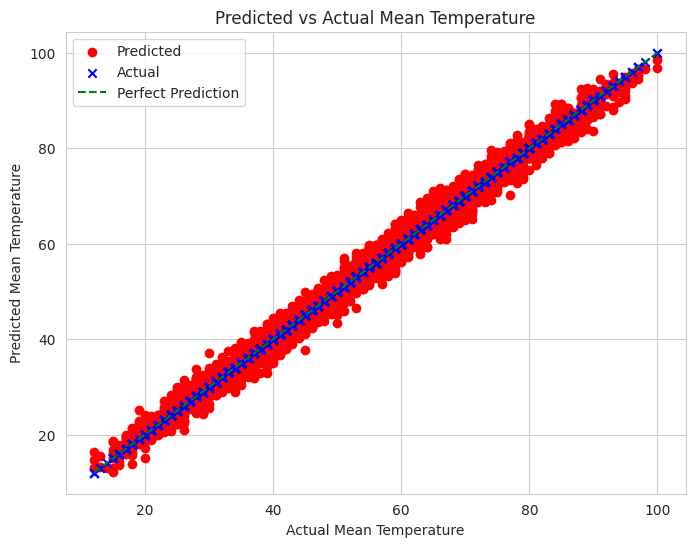

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# 1. Feature Selection and Scaling (Same as before)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = np.c_[np.ones((X.shape[0], 1)), X]

# 2. Train-Test Split (Same as before)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=32)

# 3. Create and Train the Model
model = LinearRegression()
model.fit(X_train, Y_train)

# 4. Make Predictions
Y_pred = model.predict(X_test)

# 5. Evaluate the Model
model_mae = mean_absolute_error(Y_test, Y_pred)
model_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
model_r2 = r2_score(Y_test, Y_pred)

# Print Results
print("Coefficients:", model.coef_)  # Similar to weights
print("Intercept:", model.intercept_)
print("Mean Absolute Error on Test Set:", model_mae)
print("RMSE on Test Set:", model_rmse)
print("R-Squared on Test Set:", model_r2)

# 6. Visualization
plt.figure(figsize=(8, 6))

# Use different colors and markers for better distinction
plt.scatter(Y_test, Y_pred, color='red', marker='o', label='Predicted')
plt.scatter(Y_test, Y_test, color='blue', marker='x', label='Actual')

plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],
         color='green', linestyle='--', label='Perfect Prediction')
plt.title("Predicted vs Actual Mean Temperature")
plt.xlabel("Actual Mean Temperature")
plt.ylabel("Predicted Mean Temperature")
plt.legend()
plt.grid(True)
plt.show()


## Random Forest Regressor

Mean Absolute Error on Test Set: 1.8452808253968258
RMSE on Test Set: 2.3288414880224986
R-Squared on Test Set: 0.9851411202388372


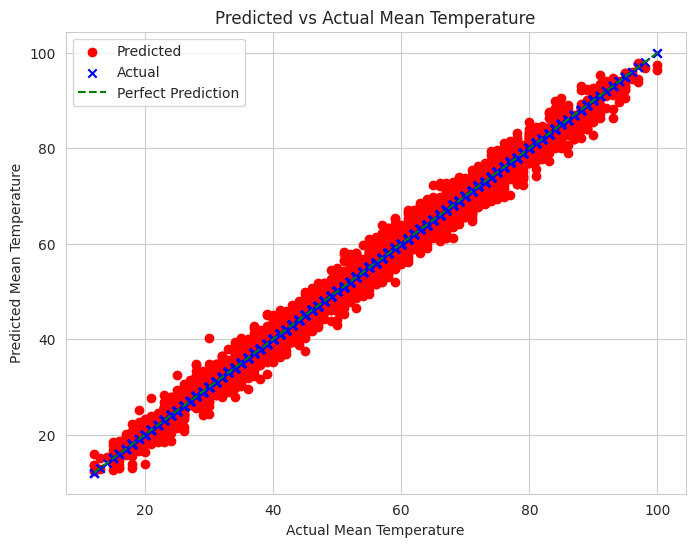

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Feature Selection and Scaling (Same as before)
scaler = StandardScaler()
X = scaler.fit_transform(X)


# 2. Train-Test Split (Same as before)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=32)

# 3. Create and Train the Model
model = RandomForestRegressor(random_state=32) # You can adjust hyperparameters here
model.fit(X_train, Y_train.ravel()) # ravel() is used to flatten Y_train

# 4. Make Predictions
Y_pred = model.predict(X_test)

# 5. Evaluate the Model
model_mae = mean_absolute_error(Y_test, Y_pred)
model_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
model_r2 = r2_score(Y_test, Y_pred)

# Print Results
print("Mean Absolute Error on Test Set:", model_mae)
print("RMSE on Test Set:", model_rmse)
print("R-Squared on Test Set:", model_r2)

# 6. Visualization
plt.figure(figsize=(8, 6))

# Use different colors and markers for better distinction
plt.scatter(Y_test, Y_pred, color='red', marker='o', label='Predicted')
plt.scatter(Y_test, Y_test, color='blue', marker='x', label='Actual')

plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],
         color='green', linestyle='--', label='Perfect Prediction')
plt.title("Predicted vs Actual Mean Temperature")
plt.xlabel("Actual Mean Temperature")
plt.ylabel("Predicted Mean Temperature")
plt.legend()
plt.grid(True)
plt.show()


## Conclusion for both models

Linear Regression performs slightly better than the Random Forest Regressor based on MAE, RMSE, and R-squared.
- R-Squared is very close for both models, indicating that both models explain a high proportion of the variance in the target variable. However, Linear Regression has a marginally higher R-Squared (0.9886 vs 0.9851), suggesting it is a slightly better fit for this particular dataset.
- MAE and RMSE are lower for the Linear Regression model, which means its predictions are, on average, closer to the actual values.
Overall, Linear Regression is the better-performing model in this case due to its lower errors, but if you are looking for a more flexible model or one that might capture more non-linear relationships, Random Forest could still be a valid choice.

## 4.Hyper-parameter Optimization with Cross-Validation

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# 1. Feature Selection and Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add Intercept Term (for Linear Regression)
X_lr = np.c_[np.ones((X.shape[0], 1)), X]

# 2. Train-Test Split
X_train_lr, X_test_lr, Y_train_lr, Y_test_lr = train_test_split(X_lr, Y, test_size=0.3, random_state=32)
X_train_rf, X_test_rf, Y_train_rf, Y_test_rf = train_test_split(X, Y, test_size=0.3, random_state=32)

# 3. Hyperparameter Optimization with RandomizedSearchCV

# Linear Regression
param_grid_lr = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}
grid_search_lr = GridSearchCV(LinearRegression(), param_grid_lr, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_lr.fit(X_train_lr, Y_train_lr)
print("Best Hyperparameters for Linear Regression:", grid_search_lr.best_params_)

# Random Forest Regression
param_grid_rf = {
    'n_estimators': [50, 100],  # Reduced options
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search_rf = RandomizedSearchCV(
    RandomForestRegressor(random_state=32, n_jobs=-1),  # Parallel processing
    param_distributions=param_grid_rf,
    n_iter=5,  # Only tests 5 random configurations
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=32
)
grid_search_rf.fit(X_train_rf, Y_train_rf.ravel())
print("Best Hyperparameters for Random Forest Regression:", grid_search_rf.best_params_)

# 4. Model Evaluation

# Linear Regression
best_lr_model = grid_search_lr.best_estimator_
Y_pred_lr = best_lr_model.predict(X_test_lr)
mae_lr = mean_absolute_error(Y_test_lr, Y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(Y_test_lr, Y_pred_lr))
r2_lr = r2_score(Y_test_lr, Y_pred_lr)

# Random Forest Regression
best_rf_model = grid_search_rf.best_estimator_
Y_pred_rf = best_rf_model.predict(X_test_rf)
mae_rf = mean_absolute_error(Y_test_rf, Y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(Y_test_rf, Y_pred_rf))
r2_rf = r2_score(Y_test_rf, Y_pred_rf)

# Print Evaluation Metrics
print("\nLinear Regression:")
print("MAE:", mae_lr)
print("RMSE:", rmse_lr)
print("R-squared:", r2_lr)

print("\nRandom Forest Regression:")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R-squared:", r2_rf)


Best Hyperparameters for Linear Regression: {'fit_intercept': False, 'positive': True}
Best Hyperparameters for Random Forest Regression: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}

Linear Regression:
MAE: 1.625749276862533
RMSE: 2.03768553648307
R-squared: 0.9886242370062446

Random Forest Regression:
MAE: 1.7576786002468938
RMSE: 2.2137278087501393
R-squared: 0.9865737524311521


- Both models performed similarly in terms of R-Squared (around 0.99), suggesting they explain a large portion of the variance in the target variable.
- Linear Regression has slightly lower MAE and RMSE, indicating more accurate predictions compared to the Random Forest model, even with the best hyperparameters.

Thus, based on the comparison of hyperparameters and performance, Linear Regression offers better performance in terms of prediction accuracy with these hyperparameters, but the Random Forest Regressor's flexibility and ability to capture non-linear relationships may still make it useful for other scenarios or more complex datasets.

## 5.Feature Selection
For Linear Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Concept and Technologies of AI/Coursework/Student_Performance.csv')

# Convert categorical column ('Extracurricular Activities') to numerical
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'No': 0, 'Yes': 1})

# Handle Missing Values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Define Features (X) and Target (Y)
X = df.drop("Performance Index", axis=1)  # Independent Variables
Y = df["Performance Index"]  # Dependent Variable

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create Linear Regression Model
lr_model = LinearRegression()

# Apply RFE for Feature Selection (select top 5 features)
selector = RFE(lr_model, n_features_to_select=5, step=1)
selector.fit(X_scaled, Y)

# Get Selected Features
selected_features_lr = X.columns[selector.support_]

# Print Selected Features
print("Selected Features for Linear Regression:", selected_features_lr.tolist())


Selected Features for Linear Regression: ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']


For Random Forest Regressor

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Concept and Technologies of AI/Coursework/Student_Performance.csv')

# Convert categorical column ('Extracurricular Activities') to numerical
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'No': 0, 'Yes': 1})

# Handle Missing Values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Define Features (X) and Target (Y)
X = df.drop("Performance Index", axis=1)  # Independent Variables
Y = df["Performance Index"].to_numpy()  # Convert to NumPy array

# Create and Train a Random Forest Model
rf_model = RandomForestRegressor(random_state=32, n_estimators=100)
rf_model.fit(X, Y)  # No need for .ravel()

# Get Feature Importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for Feature Importance Ranking
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select Top 5 Important Features
selected_features_rf = importance_df['Feature'][:5].tolist()

# Print Selected Features
print("Selected Features for Random Forest Regression:", selected_features_rf)


Selected Features for Random Forest Regression: ['Previous Scores', 'Hours Studied', 'Sample Question Papers Practiced', 'Sleep Hours', 'Extracurricular Activities']


## 6.Final Model

In [ ]:
# Assuming selected_features_lr and selected_features_rf are defined from feature selection
X_lr_selected = df[selected_features_lr].values
X_rf_selected = df[selected_features_rf].values

# Scale the selected features
scaler_lr = StandardScaler()
X_lr_selected = scaler_lr.fit_transform(X_lr_selected)
X_lr_selected = np.c_[np.ones((X_lr_selected.shape[0], 1)), X_lr_selected]  # Add intercept

scaler_rf = StandardScaler()
X_rf_selected = scaler_rf.fit_transform(X_rf_selected)

# Split data with selected features
X_train_lr_selected, X_test_lr_selected, Y_train_lr, Y_test_lr = train_test_split(
    X_lr_selected, Y, test_size=0.3, random_state=32
)
X_train_rf_selected, X_test_rf_selected, Y_train_rf, Y_test_rf = train_test_split(
    X_rf_selected, Y, test_size=0.3, random_state=32
)

# Train final models with selected features
final_lr_model = LinearRegression(**grid_search_lr.best_params_)  # Use best hyperparameters
final_lr_model.fit(X_train_lr_selected, Y_train_lr)

final_rf_model = RandomForestRegressor(random_state=32, **grid_search_rf.best_params_)  # Use best hyperparameters
final_rf_model.fit(X_train_rf_selected, Y_train_rf.ravel())

# 3. Evaluate Final Models and Print Results
# Linear Regression
Y_pred_lr = final_lr_model.predict(X_test_lr_selected)
mae_lr = mean_absolute_error(Y_test_lr, Y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(Y_test_lr, Y_pred_lr))
r2_lr = r2_score(Y_test_lr, Y_pred_lr)

# Random Forest Regression
Y_pred_rf = final_rf_model.predict(X_test_rf_selected)
mae_rf = mean_absolute_error(Y_test_rf, Y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(Y_test_rf, Y_pred_rf))
r2_rf = r2_score(Y_test_rf, Y_pred_rf)

# Print Evaluation Metrics
print("\nFinal Linear Regression:")
print("MAE:", mae_lr)
print("RMSE:", rmse_lr)
print("R-squared:", r2_lr)

print("\nFinal Random Forest Regression:")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R-squared:", r2_rf)


Final Linear Regression:
MAE: 1.6257492768625337
RMSE: 2.0376855364830706
R-squared: 0.9886242370062446

Final Random Forest Regression:
MAE: 1.758007293215566
RMSE: 2.213932177352234
R-squared: 0.9865712733277203


## 7.Conclusion

1. Model Performance:
- Linear Regression performed excellently with:
  - MAE: 1.63, RMSE: 2.04, R-Squared: 0.99. This indicates high accuracy and a good fit for the data.
- Random Forest Regressor showed strong performance but was slightly behind:
  - MAE: 1.76, RMSE: 2.21, R-Squared: 0.99. While the R-squared value is similar, it had higher MAE and RMSE, suggesting slightly larger prediction errors.
2. Impact of Methods:
- Feature Selection and Hyperparameter Tuning improved performance, especially for Random Forest, but did not drastically surpass Linear Regression's results.
  - Linear Regression: Best with fit_intercept=False and positive=True.
  - Random Forest: Best with n_estimators=50, max_depth=10, etc. These methods helped, but Linear Regression remained more accurate overall.
3. Insights and Future Directions:
- Insights: Linear Regression outperformed Random Forest slightly in terms of accuracy (MAE, RMSE), but both models explained 99% of the variance in the target.

- Future Directions:

  - Regularization (Lasso/Ridge) could prevent overfitting for Linear Regression.
  - Deep Learning or Ensemble Methods (e.g., Gradient Boosting) might further improve performance with more complex datasets.
  - Feature Engineering could also enhance model accuracy.
  
Linear Regression was the better choice for this dataset, but Random Forest offers flexibility for more complex relationships.